함수들이 너무 많아서 중요한 것만 외우기

## 1. Path

In [ ]:
import networkx as nx
%matplotlib inline

- simple, undirected network

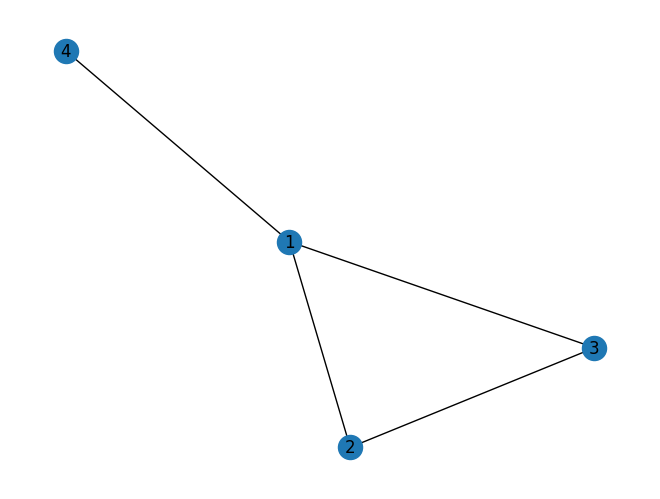

In [ ]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4])

G.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(G, with_labels=True)

*path*: a sequence of edges connecting two nodes
- 예: nodes 3과 4를 연결하는 경로

In [ ]:
nx.has_path(G, 3, 4)

True

- 두 노드 사이는 하나 이상의 경로

In [ ]:
nx.all_simple_paths(G, 3, 4)

<generator object _all_simple_paths_graph at 0x7b8f643c78b0>

In [ ]:
list(nx.all_simple_paths(G, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

- Cycle을 허용하지 않는 경우 simple path
- Shortest Path란?
 - unweighted network: 적은 수의 링크를 의미

In [ ]:
nx.shortest_path(G, 3, 4)

[3, 1, 4]

- path length

In [ ]:
nx.shortest_path_length(G, 3, 4)

2

- path length: 링크의 수가 결정, 노드의 수는 관여안함
 - 노드 $u$와 $v$에 대한 최단 경로 길이

    nx.shortest_path_length(G, u, v) == len(nx.shortest_path(G, u, v)) - 1


## 2. Connected components
- Connected Graph: 모든 노드 쌍이 경로로 연결

In [ ]:
nx.is_connected(G)

True

- disconnected

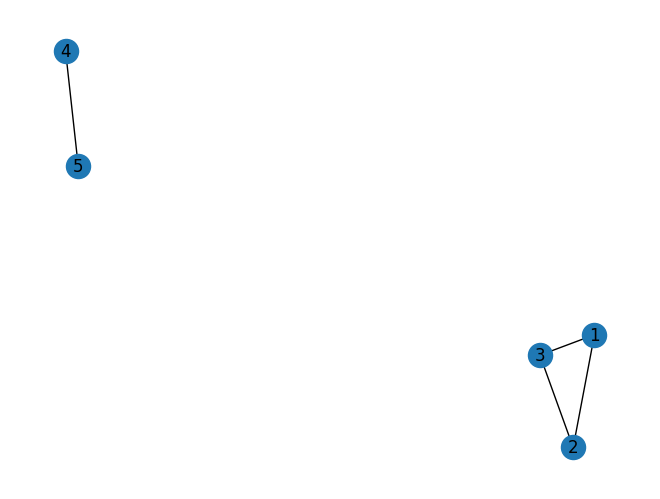

In [ ]:
G = nx.Graph()

nx.add_cycle(G, (1,2,3))
G.add_edge(4,5)

nx.draw(G, with_labels=True)

In [ ]:
nx.is_connected(G)

False

- 네트워크 내 연결되지 않은 노드 사이 경로: 오류 발생

In [ ]:
nx.has_path(G, 3, 5)

False

In [ ]:
nx.shortest_path(G, 3, 5)  # 연결이 안되서 오류가 당연함

NetworkXNoPath: No path between 3 and 5.

- Connected Components의 수

In [ ]:
nx.number_connected_components(G)

2

In [ ]:
list(nx.connected_components(G))

[{1, 2, 3}, {4, 5}]

In [ ]:
components = list(nx.connected_components(G))
len(components[0])

3

In [ ]:
max(nx.connected_components(G), key=len)

{1, 2, 3}

- 노드만 전달하여 Sub graph 구성

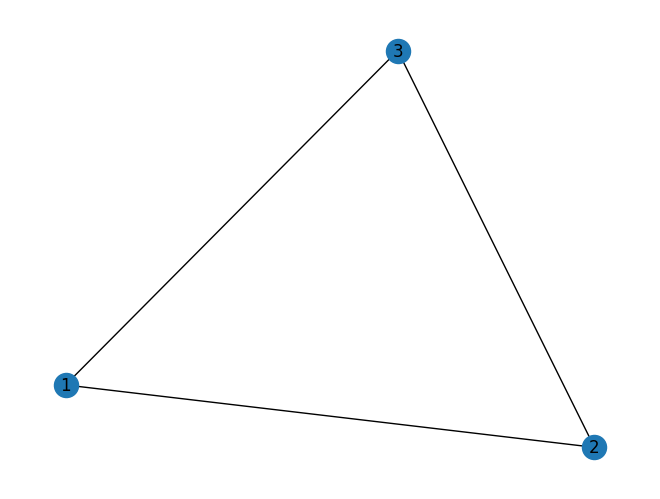

In [ ]:
core_nodes = max(nx.connected_components(G), key=len)
core = G.subgraph(core_nodes)

nx.draw(core, with_labels=True)

- 또는 `nx.connected_component_subgraphs()`사용

# 3. Directed paths & components

- 유향 그래프에서의 적용

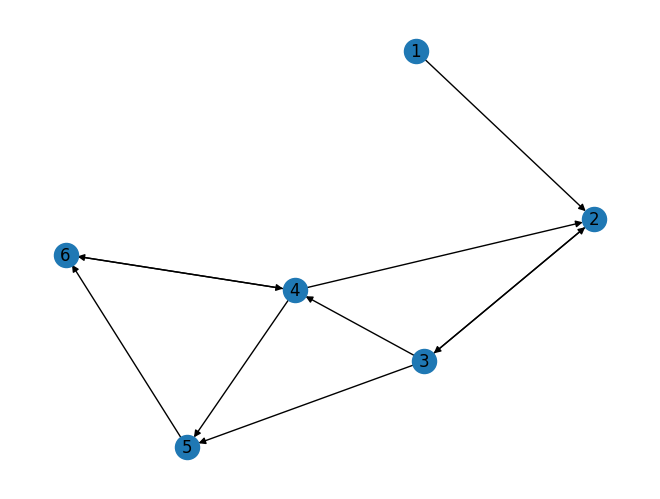

In [ ]:
D = nx.DiGraph()
D.add_edges_from([
    (1,2),
    (2,3),
    (3,2), (3,4), (3,5),
    (4,2), (4,5), (4,6),
    (5,6),
    (6,4),
])
nx.draw(D, with_labels=True)

- Directed paths의 비대칭성: 노드 $u$에서 노드 $v$로의 경로가 반대 방향을 의미하지 않을 수 있음

In [ ]:
nx.has_path(D, 1, 4)

True

In [ ]:
nx.has_path(D, 4, 1)

False

- 최단 경로 발견

In [ ]:
nx.shortest_path(D, 2, 5)

[2, 3, 5]

In [ ]:
nx.shortest_path(D, 5, 2)

[5, 6, 4, 2]

- Directed components

 - 유향 그래프
  - *Strongly connected*: 모든 노드 쌍 사이에 Directed path

In [ ]:
nx.is_strongly_connected(D)

False

 - *Weakly connected* : 모든 노드 사이에 path 존재(undirected)

In [ ]:
nx.is_weakly_connected(D)

True

In [ ]:
# This will raise an error
nx.is_connected(D)

NetworkXNotImplemented: not implemented for directed type

In [ ]:
list(nx.weakly_connected_components(D))

[{1, 2, 3, 4, 5, 6}]

In [ ]:
list(nx.strongly_connected_components(D))

[{2, 3, 4, 5, 6}, {1}]

## 4. US air traffic network 연습

In [ ]:
G = nx.read_graphml('openflights_usa.graphml.gz')

In [ ]:
nx.draw(G, with_labels=True)

In [ ]:
G.nodes['IND']       # 아래 실행 결과는 딕셔너리이며 키값가 벨류값이 있다.

{'name': 'Indianapolis International Airport',
 'latitude': 39.7173,
 'longitude': -86.294403,
 'IATA': 'IND'}

In [ ]:
G.nodes['IND']['name']

'Indianapolis International Airport'

In [ ]:
nx.shortest_path(G, 'IND', 'SFO')

['IND', 'SFO']

## 5. Small World
(크게 중요하지 않음)

In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import powerlaw
warnings.filterwarnings('ignore')

- Watts-Strogatz (small world) graphs: large clustering coefficient,  short distances

- regular lattice (p=0)

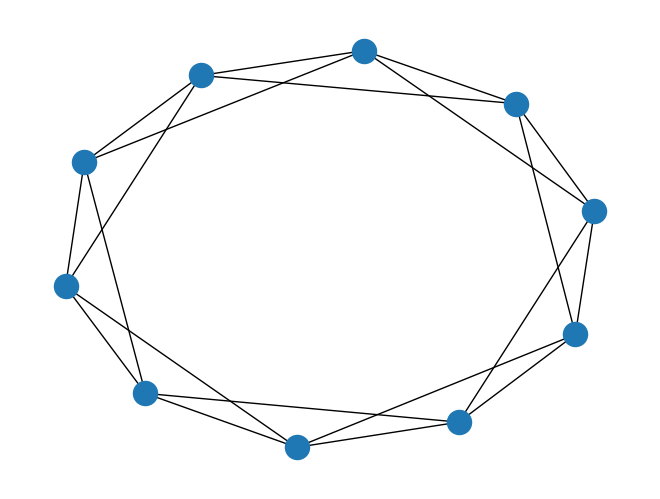

In [ ]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(10, k=4, p=0)
nx.draw(ws)

In [ ]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.5


In [ ]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 1.6666666666666667


- random netwroks (p=1)..

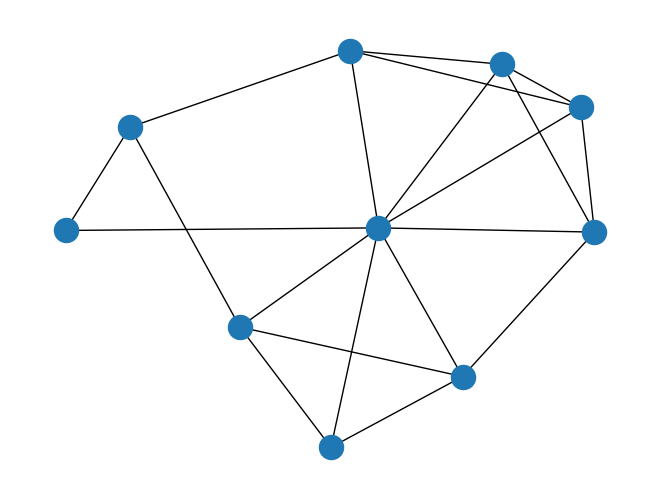

In [ ]:
# network generators 2 (small-world)
ws = nx.watts_strogatz_graph(10, k=4, p=1)
nx.draw(ws)

In [ ]:
print(f"Global clustering: {nx.average_clustering(ws)}")

Global clustering: 0.5321428571428573


In [ ]:
print(f"Average shortest path: {nx.average_shortest_path_length(ws)}")

Average shortest path: 1.5777777777777777


## Importing the library
As a first step just import the ``networkx`` library.

In [ ]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

아래는
해당 코드는 Jupyer notebook을 실행한 브라우저에서 그림을 볼 수 있도록,

브라우저 내부(Inline)에 그려지도록 하는 코드입니다.

​

이는 도표, 그래프, 그림, 소리, 애니메이션 등과 같은 산출물(Rich output)을 표현하는 방법 중 하나입니다.

In [ ]:
%matplotlib inline

- Erdos-Renyi (random) graphs: N개 노드와 각 노드의 쌍이 모두 p의 확률로 연결된 랜덤 그래프

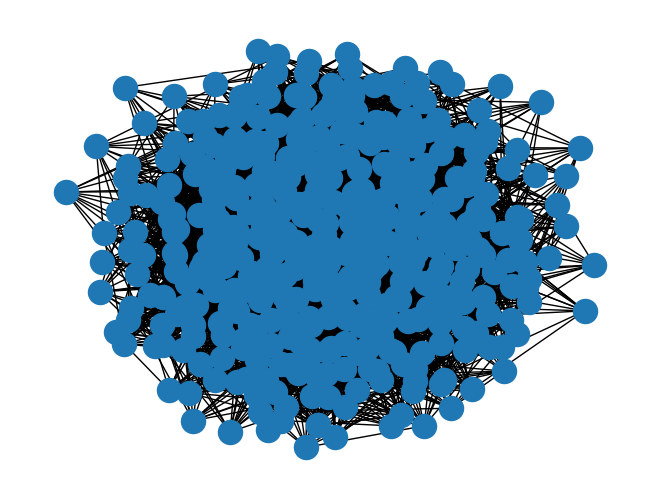

In [ ]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(400, 0.05)
nx.draw(er)

ER degree distribution

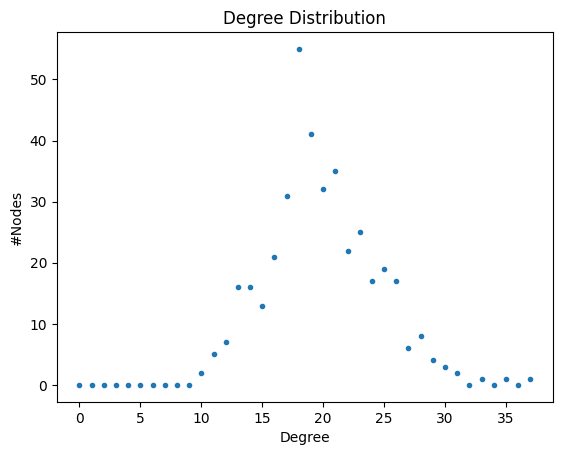

In [ ]:
hist = nx.degree_histogram(er)          # 여기는 좀 알아두면 그래프 파악?에 도움

plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

- p와 N의 변화

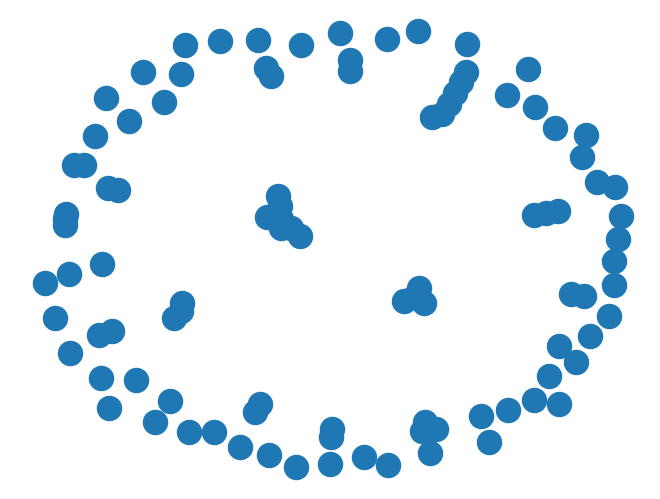

In [ ]:
er = nx.erdos_renyi_graph(100, 0.005)
nx.draw(er)

- Connected: <k> > ln N, p > (ln N)/N

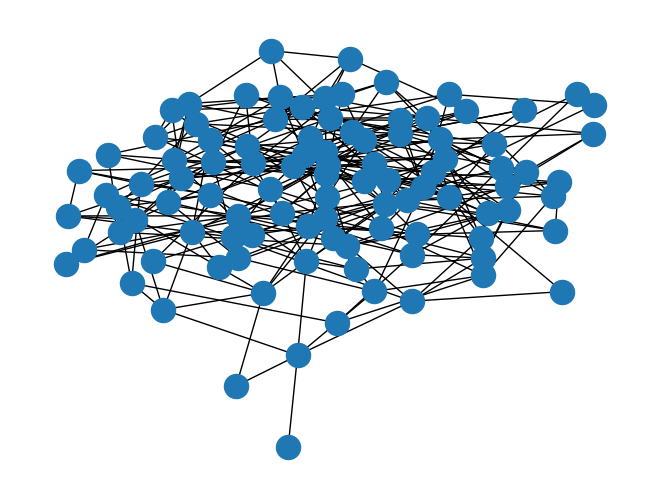

In [ ]:
er = nx.erdos_renyi_graph(100, 0.06)
nx.draw(er)